# 1 Loading

In [ ]:
# Importing essential modules
import os
import keras
import pandas            as pd
import numpy             as np
from numpy                     import take
import matplotlib.pyplot as plt
import torch.utils.data  as data
from keras.models              import Sequential
from keras.layers              import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils               import to_categorical, image_dataset_from_directory
from keras.preprocessing       import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils               import to_categorical
from torchvision.datasets      import ImageFolder

In [ ]:
## Mount notebook to Google Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# Changing directory
!pwd
dir = '/content/drive/MyDrive/Capstone_Project_3/data'
os.chdir(dir)

Mounted at /content/drive
/content


In [ ]:
!pwd

/content/drive/MyDrive/Capstone_Project_3/data


In [ ]:
# Data loading 
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
    

# Creating training dataset
train_data = train_gen.flow_from_directory(dir, target_size =(224, 224), 
                                          batch_size=32, class_mode='binary',
                                           subset='training')
    
# Creating test dataset
test_data = train_gen.flow_from_directory(dir, target_size=(224, 224),
                                          batch_size=32, class_mode='binary',
                                          subset='validation')

train_dataset = image_dataset_from_directory(dir,
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))

Found 3888 images belonging to 4 classes.
Found 1666 images belonging to 4 classes.
Found 5554 files belonging to 4 classes.


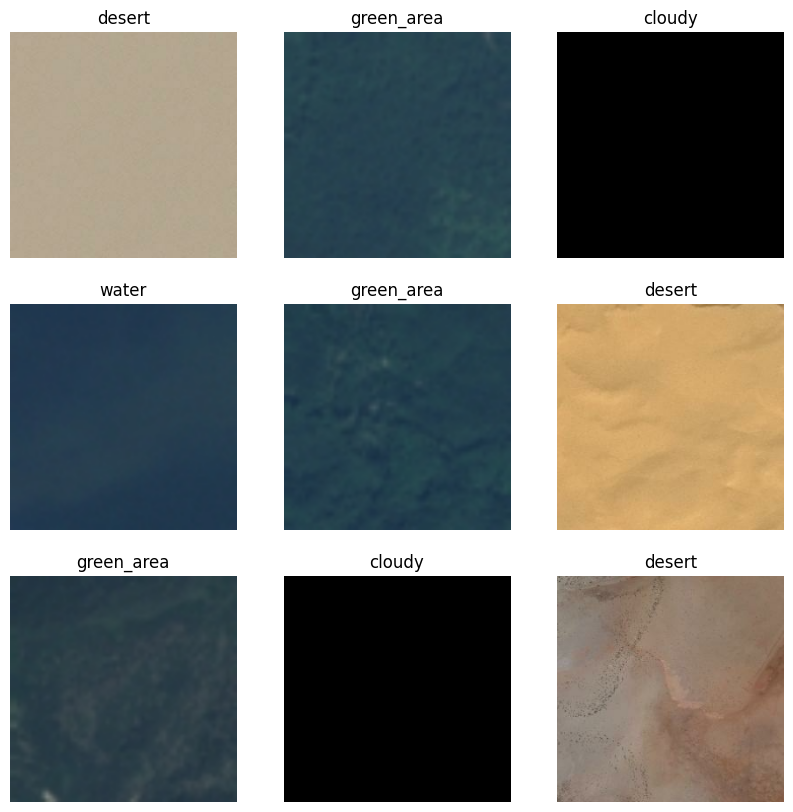

In [ ]:
# Deriving class lables
class_names =  train_dataset.class_names

# Printing out 
plt.figure(figsize = (10,10))
for image, label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

# 2 Preprocessing

In [ ]:
# Checking dimensions
print(image[0])

# Initalizing model
model = Sequential()

# Creating CNN model
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

tf.Tensor(
[[[180.14285 165.14285 144.14285]
  [180.14285 165.14285 144.14285]
  [180.47449 165.47449 144.47449]
  ...
  [181.35713 166.35713 143.35713]
  [180.21428 165.21428 142.21428]
  [179.07141 164.07141 141.07141]]

 [[182.41327 167.41327 146.41327]
  [182.21428 167.21428 146.21428]
  [182.13776 167.13776 146.13776]
  ...
  [181.28061 166.28061 143.28061]
  [180.21428 165.21428 142.21428]
  [179.2704  164.2704  141.2704 ]]

 [[183.59694 168.59694 147.59694]
  [182.92348 167.92348 146.92348]
  [182.41327 167.41327 146.41327]
  ...
  [181.      166.      143.     ]
  [180.21428 165.21428 142.21428]
  [180.      165.      142.     ]]

 ...

 [[182.      167.      144.     ]
  [182.      167.      144.     ]
  [182.      167.      144.     ]
  ...
  [179.      164.      141.     ]
  [180.64796 165.64796 142.64796]
  [182.52554 167.52554 144.52554]]

 [[182.      167.      144.     ]
  [182.      167.      144.     ]
  [182.      167.      144.     ]
  ...
  [180.49492 165.49492 142.

In [ ]:
# Getting summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

# 3. Modeling 

In [ ]:
# Compiling model
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Fitting model
history = model.fit(train_dataset, epochs=22, validation_data=test_data)

Epoch 1/22
122/122 [==============================] - 195s 2s/step - loss: 0.4739 - accuracy: 0.7986 - val_loss: 0.3304 - val_accuracy: 0.8511
Epoch 2/22
122/122 [==============================] - 17s 140ms/step - loss: 0.3587 - accuracy: 0.8583 - val_loss: 0.3869 - val_accuracy: 0.8463
Epoch 3/22
122/122 [==============================] - 17s 139ms/step - loss: 0.3199 - accuracy: 0.8693 - val_loss: 0.2807 - val_accuracy: 0.8649
Epoch 4/22
122/122 [==============================] - 17s 137ms/step - loss: 0.3025 - accuracy: 0.8781 - val_loss: 0.3065 - val_accuracy: 0.8517
Epoch 5/22
122/122 [==============================] - 18s 145ms/step - loss: 0.3243 - accuracy: 0.8688 - val_loss: 0.2814 - val_accuracy: 0.8890
Epoch 6/22
122/122 [==============================] - 17s 139ms/step - loss: 0.2986 - accuracy: 0.8814 - val_loss: 0.3262 - val_accuracy: 0.8601
Epoch 7/22
122/122 [==============================] - 18s 144ms/step - loss: 0.3187 - accuracy: 0.8729 - val_loss: 0.3602 - val_accu

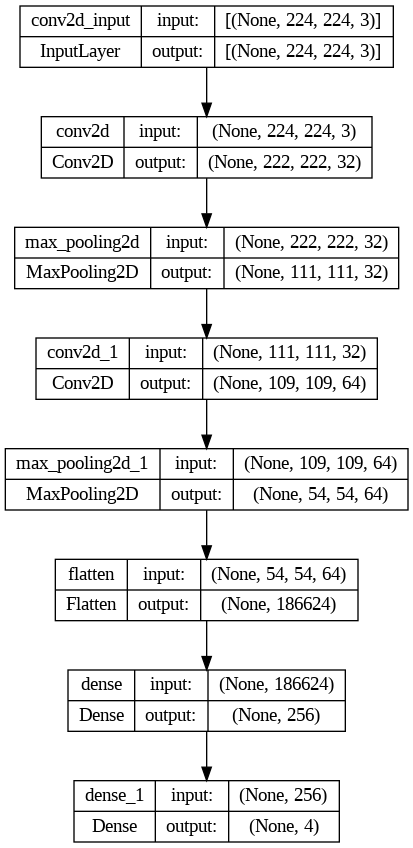

In [ ]:
from tensorflow.keras.utils import plot_model
from PIL import Image

# Generating an image of CNN model
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('cnn_model.png'))

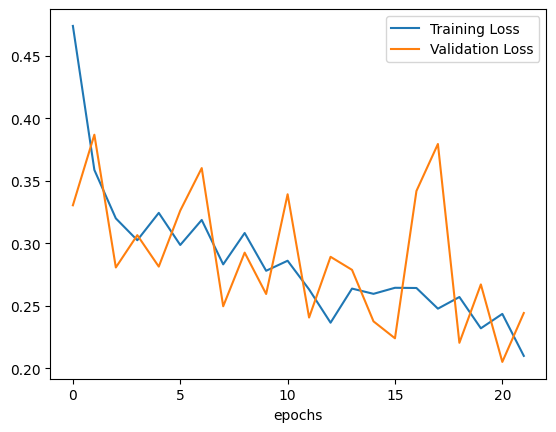

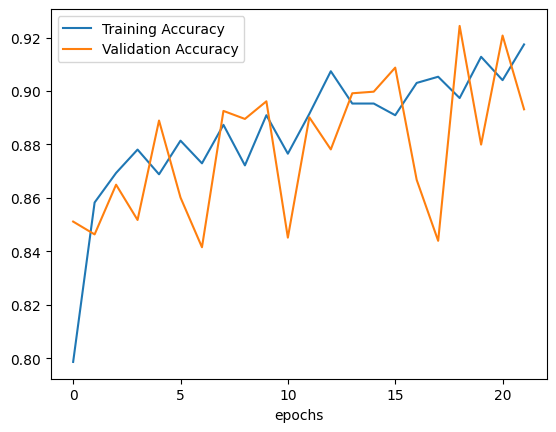

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# 4. Dealing with Overfitting: Data Augmentation and Dropout

In [ ]:
from tensorflow.keras import layers

# Data augmentation generates additional
# training data from your existing images by augmenting them
# using random transformations that yield believable-looking images. 
# This will approach will help manage the overfitting of the model.
data_augmentation = keras.Sequential(
  [layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),])

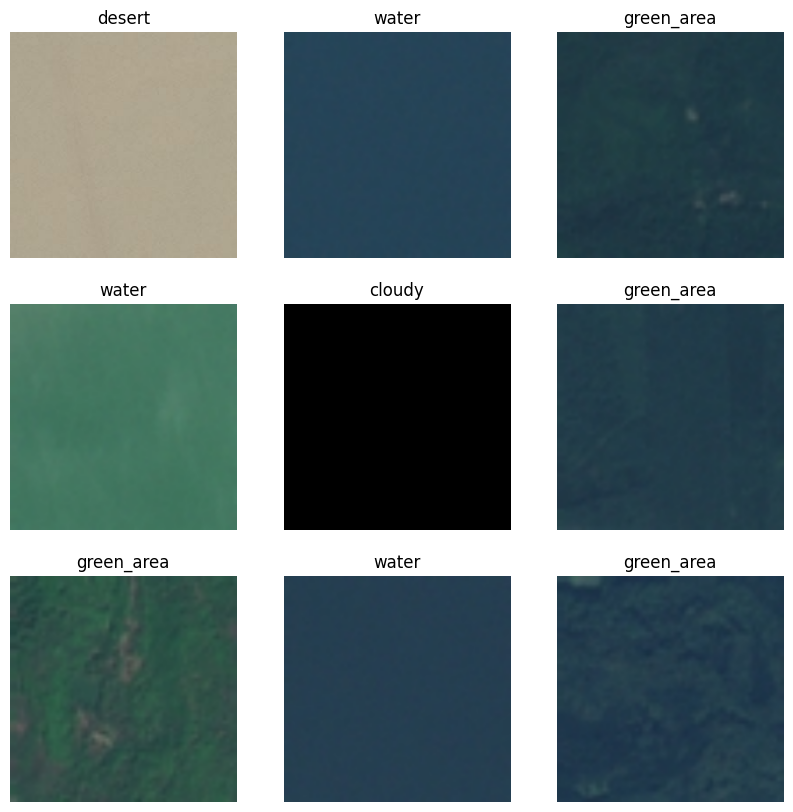

In [ ]:
# Visualizing augmented images
plt.figure(figsize = (10,10))
for image, label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [ ]:
# Creating another CNN model using the augmented images with a 
# dropout layer.
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(4, activation='softmax', name="outputs")])

In [ ]:
# Compling new model
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [ ]:
# Getting summary of new model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [ ]:
# Fitting model
history = model.fit(train_dataset, epochs=30, validation_data=test_data)

Epoch 1/30


174/174 [==============================] - 50s 258ms/step - loss: 0.3515 - accuracy: 0.8174 - val_loss: 11.7494 - val_accuracy: 0.2581
Epoch 2/30
174/174 [==============================] - 43s 245ms/step - loss: 0.2110 - accuracy: 0.9100 - val_loss: 13.7337 - val_accuracy: 0.2581
Epoch 3/30
174/174 [==============================] - 45s 256ms/step - loss: 0.1941 - accuracy: 0.9184 - val_loss: 14.1629 - val_accuracy: 0.2581
Epoch 4/30
174/174 [==============================] - 43s 246ms/step - loss: 0.1681 - accuracy: 0.9283 - val_loss: 13.7034 - val_accuracy: 0.2581
Epoch 5/30
174/174 [==============================] - 45s 254ms/step - loss: 0.1606 - accuracy: 0.9316 - val_loss: 16.2440 - val_accuracy: 0.2581
Epoch 6/30
174/174 [==============================] - 43s 245ms/step - loss: 0.1627 - accuracy: 0.9307 - val_loss: 17.9201 - val_accuracy: 0.2581
Epoch 7/30
174/174 [==============================] - 44s 251ms/step - loss: 0.1449 - accuracy: 0.9381 - val_loss: 18.7067 - val_accura

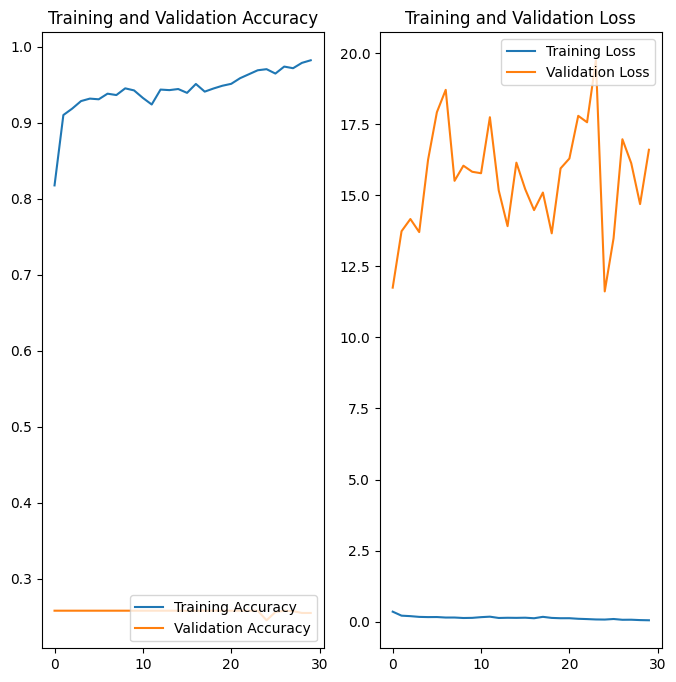

In [ ]:
# Visualizing results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()